In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, tree, ensemble
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [103]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


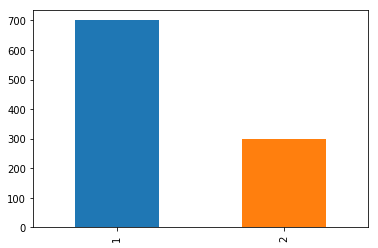

In [104]:
df.default.value_counts().plot.bar()

In [105]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [106]:
target = "default"
X = df.copy()
del X[target]
y = np.where(df[target] == 2, 1, 0)

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print(est.steps[-1][-1].coef_)

[[ 0.312818    0.44524518  0.49086746  0.10890534 -0.2880066   0.3079002
   0.11714795  0.18195057 -0.08142242 -0.5749465   0.29105841  0.42514838
   0.3337207   0.73250572  0.18738057 -0.43058567  0.01274016 -0.00280322
  -0.16861492 -0.12967034 -0.28655782  0.05732714 -0.12872286  0.06841528
   0.17669126 -0.3161011  -0.20575089 -0.03286388 -0.27588005 -0.11543802
   0.02534225 -0.17640648 -0.15684574 -0.47904412 -0.36407674 -0.20637507
  -0.03303847 -0.15464135  0.12350467 -0.26639548 -0.03639339  0.06726915
   0.22992616 -0.22814847  0.20477278 -0.0471206  -0.13272026  0.06920077]]


In [107]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

In [108]:
result.head()

,actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1


In [109]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [110]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a2494fda0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25dff550>)

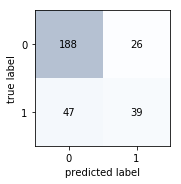

In [111]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [112]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [113]:
y_test_prob = est.predict_proba(X_test)[:,1]

In [114]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

(<matplotlib.figure.Figure at 0x1a25ded748>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24965160>)

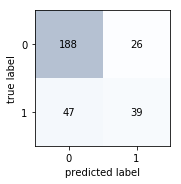

In [115]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [116]:
pd.DataFrame({"feature": X.columns, "coefficients": est.steps[-1][-1].coef_[0]})

,coefficients,feature
0,0.312818,months_loan_duration
1,0.445245,amount
2,0.490867,installment_rate
3,0.108905,residence_history
4,-0.288007,age
5,0.307900,existing_credits
6,0.117148,dependents
7,0.181951,checking_balance_< 0 DM
8,-0.081422,checking_balance_> 200 DM
9,-0.574947,checking_balance_unknown


Text(0.5,1,'ROC, auc: 0.758476')

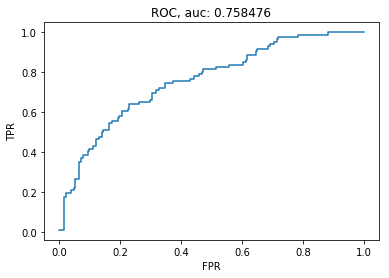

In [117]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))

Accuracy: 0.733333
Precision: 0.557692
Recall: 0.337209


Text(0.5,1,'ROC, auc: 0.730222')

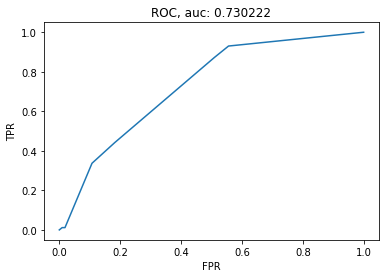

In [137]:
target = "default"
X = df.copy()
del X[target]
y = np.where(df[target] == 2, 1, 0)

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", tree.DecisionTreeClassifier(max_depth=3))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))

In [138]:
model = est.steps[-1][-1]
pd.DataFrame({"feature": X.columns, 
            "importance": model.feature_importances_})\
.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.526610
0,months_loan_duration,0.181563
24,savings_balance_< 100 DM,0.085239
11,credit_history_fully repaid,0.084542
4,age,0.062193
39,installment_plan_none,0.059853
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000
30,employment_length_unemployed,0.000000


In [139]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png

In [28]:
age_bins = np.array([25, 35, 50, 60])
X["age_group"] = pd.Series(["g%d" % g for g in np.digitize(age, age_bins)])

Accuracy: 0.726667
Precision: 0.552632
Recall: 0.244186


Text(0.5,1,'ROC, auc: 0.771979')

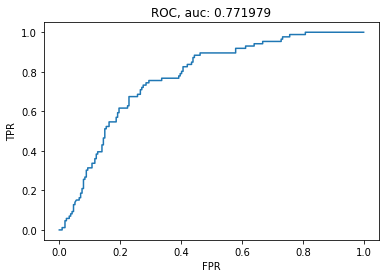

In [32]:
target = "default"
X = df.copy()
del X[target]
y = np.where(df[target] == 2, 1, 0)

age_bins = np.array([25, 35, 50, 60])
X["age_group"] = pd.Series(["g%d" % g for g in np.digitize(age, age_bins)])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", ensemble.RandomForestClassifier(max_depth=5, random_state=1))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))

In [33]:
X.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident,age_group_g1,age_group_g2,age_group_g3,age_group_g4
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,1,1,0,0,0,0,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,0,0,1,0,1,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,0,1,1,0,0,0,0,1,0


# Credit card fraud dataset

In [89]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. Build a model to predict the "Class" column based on V1 to V28.
2. Find baseline accuracy, model accuracy, precision and recall scores. 
3. What is the total number of misclassifications?
4. Which metric is most suitable in your opinion
5. For every false negative, bank would take a loss for the entire transaction amount. What is the total loss?

In [3]:
target = "Class"
X = df.iloc[:, 1:-1]
y = df[target]
#X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, 
                                        test_size = 0.3, random_state = 1)

amount_test = X_test[:, -1]
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LogisticRegression(random_state=345))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Coefficient: ", est.steps[-1][-1].coef_)

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

KeyError: 'Class'

In [54]:
base_line_accuracy = np.max(y_train.value_counts()/len(y_train))
base_line_accuracy

0.9982093055917819

(<matplotlib.figure.Figure at 0x1a236daa58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2309fcc0>)

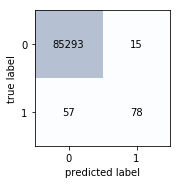

In [55]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [58]:
57 + 15

72

In [57]:
np.sum(amount_test[(y_test == 1) & (y_test_pred == 0)])

11529.029999999999

Accuracy: 0.999157
Precision: 0.838710
Recall: 0.577778


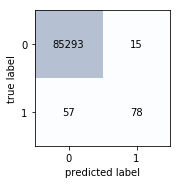

In [91]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

If I increase the threshold to 0.8, will TP go up?

Accuracy: 0.999099
Precision: 0.862500
Recall: 0.511111


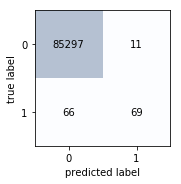

In [92]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

Accuracy: 0.999181
Precision: 0.782609
Recall: 0.666667


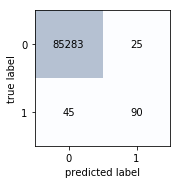

In [93]:
y_test_prob = est.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.2, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

f1_score = 2 * precision * recall/(precision + recall)

Text(0.5,1,'ROC, auc: 0.966718')

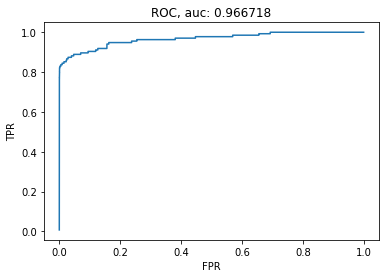

In [68]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: %f" % (metrics.auc(fpr, tpr)))

In [94]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [98]:
int(len(df) * .7)

199364

In [99]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64